<a href="https://colab.research.google.com/github/HilbertN/Redes_Neuronales/blob/main/RN1_RedDesdeCero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python


## Clases

In [ ]:
class Humano:
  def __init__(self,edad): #Aquí definimos los atributos del objeto
    self.edad=edad

#Después definimos los métodos
  def hablar(self,mensaje):
    print(mensaje )


In [ ]:
pedro=Humano(26)
juan=Humano(30)

In [ ]:
print("soy pedro y tengo",pedro.edad,"de edad")

soy pedro y tengo 26 de edad


In [ ]:
juan.hablar('Hola')

Hola


## Herencia

In [ ]:
#El ingeniero en sistemas y el licenciado de derecho siguen siendo humanos entonces
#queremos que tengan los mismos atributos y métodos que tiene la clase humano.

class IngSistemas(Humano):
  def lenguaje(self,programa):
    print("voya a programar en", programa)
Pedro=IngSistemas(26)

#Si creamos un __init__ especial para la clase Liceciando en derecho entonces
#no considera el __init_ de la clase humana, es decir, ya no hereda los atributos
#de la clase humana y solo considera los de la subclase.

#Observación importante: debemos tener en cuenta que ya no considera los atributos
#de la clase Humano, pero sí los métodos entonces si un método hace uso de alguno de
#los atributos de esta clase entonces vamos a tener un error.

class LicDerecho(Humano):
  def __init__(self):
    print('Yo te puedo divociar sin firma de tu cónyuge')
  def estudiarcaso(self,de):
    print("debo estudiar el caso de", de)



In [ ]:
#Observamos que pedro contiene los métodos que tiene la clase humano
Pedro.hablar('Hola juan')

Hola juan


In [ ]:
Juan=LicDerecho()

Yo te puedo divociar sin firma de tu cónyuge


## Herencia múltiple


In [ ]:
#Podemos crear una clase que tenga los métodos de dos o más clases de la siguiente forma
class Estudioso(IngSistemas,LicDerecho):
  pass
#Observaciones importantes:
#Cuando creamos una clase debe haber métodos, para evitar escribir algun método podemos escribir 'pass'.
#Los atributos (método que se forma con __init__) los va a tomar de la primera Clase entonces el orden es importante.
#Primero considera las clases que coloca a en parátensis y luego si hay clases de herencia.

In [ ]:
Oscar=Estudioso()

Yo te puedo divociar sin firma de tu cónyuge


# Redes neuronales (Código Clase)

Por cierto, cuando describí los datos de MNIST anteriormente, mencioné que estaban divididos en 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba. Esa es la descripción oficial de MNIST. En realidad, vamos a dividir los datos de manera un poco diferente. Dejaremos las imágenes de prueba como están, pero dividiremos el conjunto de entrenamiento de MNIST de 60,000 imágenes en dos partes: un conjunto de 50,000 imágenes que utilizaremos para entrenar nuestra red neuronal, y un conjunto de validación separado de 10,000 imágenes. No utilizaremos los datos de validación en este capítulo, pero más adelante en el libro nos serán útiles para determinar cómo ajustar ciertos hiperparámetros de la red neuronal, como la tasa de aprendizaje, y otros aspectos que no son seleccionados directamente por nuestro algoritmo de aprendizaje. Aunque los datos de validación no formen parte de la especificación original de MNIST, muchas personas utilizan MNIST de esta manera, y el uso de datos de validación es común en las redes neuronales. A partir de ahora, cuando me refiera a los "datos de entrenamiento de MNIST", estaré hablando de nuestro conjunto de datos de 50,000 imágenes, no del conjunto original de 60,000 imágenes*.

Permítanme explicar las características principales del código de las redes neuronales antes de proporcionar el listado completo que se encuentra más abajo. El elemento central es una clase llamada "Network" (Red), que utilizamos para representar una red neuronal. Aquí está el código que utilizamos para inicializar un objeto de tipo "Network":

In [ ]:
import numpy as np
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

Los sesgos (biases) y los pesos (weights) en el objeto de la red (Network) se inicializan aleatoriamente, utilizando la función np.random.randn de Numpy para generar distribuciones gaussianas con media 0 y desviación estándar 1. Esta inicialización aleatoria brinda a nuestro algoritmo de descenso de gradiente estocástico un punto de partida. En capítulos posteriores encontraremos mejores formas de inicializar los pesos y sesgos, pero esto servirá por ahora. Es importante destacar que el código de inicialización de la red asume que la primera capa de neuronas es la capa de entrada (input layer) y omite establecer cualquier sesgo para esas neuronas, ya que los sesgos solo se utilizan para calcular las salidas de las capas posteriores.

También es importante señalar que los sesgos (biases) y los pesos (weights) se almacenan como listas de matrices de Numpy. Por ejemplo, net.weights[1] es una matriz de Numpy que almacena los pesos que conectan la segunda y tercera capa de neuronas. (No es la primera y segunda capa, ya que la indexación de listas en Python comienza en 0). Dado que net.weights[1] es bastante largo, simplemente denotemos esa matriz como "w". Esta matriz es tal que wjk es el peso para la conexión entre la k-ésima neurona en la segunda capa y la j-ésima neurona en la tercera capa. El ordenamiento de los índices j y k puede parecer extraño; ¿no tendría más sentido intercambiar los índices j y k? La gran ventaja de usar este ordenamiento es que significa que el vector de activaciones de la tercera capa de neuronas es:
a′=σ(wa+b).(22)
En esta ecuación hay bastante sucediendo, así que vamos a desglosarla pieza por pieza. "a" es el vector de activaciones de la segunda capa de neuronas. Para obtener "a′", multiplicamos "a" por la matriz de pesos "w" y sumamos el vector de sesgos "b". Luego, aplicamos la función "σ" elemento por elemento a cada entrada en el vector "wa+b". (Esto se llama vectorizar la función "σ").


Con todo esto en mente, es fácil escribir código para calcular la salida de una instancia de red (Network). Comenzamos definiendo la función sigmoide:

In [ ]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

Ten en cuenta que cuando la entrada "z" es un vector o una matriz de Numpy, Numpy aplica automáticamente la función sigmoide elemento por elemento, es decir, en forma vectorizada.

Luego agregamos un método de propagación hacia adelante (feedforward) a la clase Network, que, dado una entrada "a" para la red, devuelve la salida correspondiente.

In [ ]:
  def feedforward(self, a):
        """Return the output of the network if "a" is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

In [ ]:
 def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
#Entrena la red neuronal utilizando el descenso de gradiente estocástico en mini lotes.
#Los "training_data" son una lista de tuplas "(x, y)" que representan las entradas de entrenamiento y
#las salidas deseadas. Los otros parámetros no opcionales son autoexplicativos. Si se proporciona "test_data",
#la red será evaluada con respecto a los datos de prueba después de cada época, y se mostrará el progreso parcial.
#Esto es útil para hacer un seguimiento del progreso, pero ralentiza las cosas sustancialmente.
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}").format(
                    j, self.evaluate(test_data), n_test)
            else:
                print ("Epoch {0} complete").format(j)

El código funciona de la siguiente manera. En cada época, comienza aleatoriamente reordenando los datos de entrenamiento y luego los divide en mini lotes del tamaño adecuado. Esta es una forma sencilla de muestrear aleatoriamente los datos de entrenamiento. Luego, para cada mini_lote, aplicamos un solo paso de descenso de gradiente. Esto se hace con el código self.update_mini_batch(mini_lote, eta), que actualiza los pesos y sesgos de la red según una sola iteración del descenso de gradiente, utilizando solo los datos de entrenamiento en el mini_lote. Aquí está el código para el método update_mini_batch:

In [ ]:
    def update_mini_batch(self, mini_batch, eta):
        #Actualiza los pesos y sesgos de la red aplicando el descenso de gradiente utilizando
        #la retropropagación (backpropagation) en un solo mini lote.
        #El "mini_lote" es una lista de tuplas "(x, y)", y "eta" es la tasa de aprendizaje (learning rate).
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

¿Qué tan bien reconoce el programa los dígitos escritos a mano? Bueno, empecemos por cargar los datos de MNIST. Haré esto utilizando un pequeño programa auxiliar llamado "mnist_loader.py", que se describirá a continuación. Ejecutamos los siguientes comandos en una consola de Python:

In [ ]:
#import mnist_loader
#training_data, validation_data, test_data =  mnist_loader.load_data_wrapper()

Después de cargar los datos de MNIST, configuraremos una red neuronal con 30 neuronas ocultas. Hacemos esto después de importar el programa Python mencionado anteriormente, que se llama "network".

In [ ]:
#import network --> se importa el network porque se supone que esta en otro archivo de python
#net = network.Network([784, 30, 10])

Finalmente, utilizaremos el descenso de gradiente estocástico para aprender a partir de los datos de entrenamiento de MNIST durante 30 épocas, con un tamaño de mini lote de 10 y una tasa de aprendizaje de η=3.0.

In [ ]:
#net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Anteriormente, omití los detalles sobre cómo se cargan los datos de MNIST. Es bastante sencillo. Para completar la información, aquí tienes el código. Las estructuras de datos utilizadas para almacenar los datos de MNIST se describen en las cadenas de documentación; es algo sencillo, tuplas y listas de objetos Numpy ndarray (piensa en ellos como vectores si no estás familiarizado con ndarrays):

Una librería para cargar los datos de imágenes de MNIST. Para obtener detalles sobre las estructuras de datos que se devuelven, consulta las cadenas de documentación de las funciones "load_data" y "load_data_wrapper". En la práctica, la función "load_data_wrapper" es la que generalmente se llama en nuestro código de red neuronal.

In [ ]:
import pickle # cPickle Esta libreria ya no esta disponible en python 3, en su lugar esta pickle
import gzip
import numpy as np

Devuelve los datos de MNIST como una tupla que contiene los datos de entrenamiento, los datos de validación y los datos de prueba.

Los "training_data" se devuelven como una tupla con dos entradas. La primera entrada contiene las imágenes de entrenamiento reales. Esto es un ndarray de Numpy con 50,000 entradas. Cada entrada es, a su vez, un ndarray de Numpy con 784 valores, que representan los 28 * 28 = 784 píxeles en una sola imagen de MNIST.

La segunda entrada en la tupla "training_data" es un ndarray de Numpy que contiene 50,000 entradas. Esas entradas son simplemente los valores de los dígitos (0...9) para las imágenes correspondientes contenidas en la primera entrada de la tupla.

Los "validation_data" y "test_data" son similares, excepto que cada uno contiene solo 10,000 imágenes.

Este es un buen formato de datos, pero para su uso en redes neuronales, es útil modificar un poco el formato de los "training_data". Eso se hace en la función auxiliar "load_data_wrapper()", como se muestra a continuación.

In [ ]:
def load_data():
    f = gzip.open('../data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f)# se cambia cPickle.load(f) por pickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)


Devuelve una tupla que contiene (training_data, validation_data, test_data). Está basado en la función "load_data", pero el formato es más conveniente para su uso en nuestra implementación de redes neuronales.

En particular, "training_data" es una lista que contiene 50,000 tuplas (x, y). "x" es un ndarray de Numpy de 784 dimensiones que contiene la imagen de entrada. "y" es un ndarray de Numpy de 10 dimensiones que representa el vector unitario correspondiente al dígito correcto para "x".

"validation_data" y "test_data" son listas que contienen 10,000 tuplas (x, y). En cada caso, "x" es un ndarray de Numpy de 784 dimensiones que contiene la imagen de entrada, y "y" es la clasificación correspondiente, es decir, los valores de los dígitos (enteros) correspondientes a "x".

Obviamente, esto significa que estamos utilizando formatos ligeramente diferentes para los datos de entrenamiento y los datos de validación / prueba. Estos formatos resultan ser los más convenientes para su uso en nuestro código de red neuronal.

In [ ]:
def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

Devuelve un vector unitario de 10 dimensiones con un valor de 1.0 en la posición j-ésima y ceros en las demás posiciones. Esto se utiliza para convertir un dígito (0...9) en una salida deseada correspondiente de la red neuronal.

In [ ]:
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

Algoritmo completo:

In [ ]:
# %load network.py

"""
network.py
~~~~~~~~~~
IT WORKS

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """La lista sizes contiene el número de neuronas en las capas
        respectivas de la red neuronal. Por ejemplo, si la lista fuera
        [2, 3, 1], entonces sería una red de tres capas, con la primera
        capa conteniendo 2 neuronas, la segunda capa 3 neuronas y la
        tercera capa 1 neurona. Los sesgos (biases) y pesos (weights) de
        la red se inicializan de forma aleatoria, utilizando una
        distribución Gaussiana con media 0 y varianza 1.
        Es importante destacar que se asume que la primera
        capa es una capa de entrada y, por convención, no estableceremos
        ningún sesgo para esas neuronas, ya que los sesgos solo se
        utilizan para calcular las salidas de las capas posteriores."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Devuelve la salida de la red si a es la entrada."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Entrena la red neuronal utilizando el descenso de gradiente
        estocástico por lotes pequeños (mini-batch). Los datos de
        entrenamiento, representados por la lista de tuplas (x, y),
        contienen las entradas de entrenamiento y las salidas deseadas.
        Los demás parámetros que no son opcionales son autoexplicativos.
        Si se proporciona test_data, entonces la red se evaluará con
        respecto a los datos de prueba después de cada época y se
        imprimirá el progreso parcial. Esto es útil para hacer un
        seguimiento del progreso, pero ralentiza sustancialmente el
        proceso. En resumen, esta función entrena la red neuronal
        utilizando el método de descenso de gradiente estocástico por
        lotes pequeños, ajustando los pesos y sesgos de la red en función
        de los datos de entrenamiento proporcionados. Además,
        si se proporcionan datos de prueba, se evalúa el rendimiento
        de la red en los datos de prueba después de cada época para
        realizar un seguimiento de su mejora a lo largo del tiempo."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test))
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Actualiza los pesos y sesgos de la red aplicando el descenso
        de gradiente utilizando la retropropagación (backpropagation) a
        un solo mini lote. El parámetro mini_batch es una lista de tuplas
        (x, y), donde x representa las entradas y y las salidas deseadas
        correspondientes a ese mini lote. El parámetro eta representa
        la tasa de aprendizaje (learning rate).
        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Devuelve una tupla (nabla_b, nabla_w) que representa el
        gradiente para la función de costo C_x. nabla_b y nabla_w son
        listas de matrices de numpy, similares a self.biases y self.weights,
        pero se refieren al gradiente de la función de costo en relación
        con los sesgos y pesos de la red neuronal, respectivamente.."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Devuelve el número de entradas de prueba para las cuales la red
        neuronal produce el resultado correcto. Se asume que la salida de
        la red neuronal es el índice de la neurona en la capa final que
        tiene la mayor activación."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Devolver el vector de derivadas parciales \partial C_x /
        \partial para las activaciones de salida."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """Función sigmoide."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivada de la función sigmoide."""
    return sigmoid(z)*(1-sigmoid(z))

# Probando la red neuronal con el conjunto MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
dataset=mnist.load_data()
dat=np.array(dataset)

<ipython-input-4-84c6aeb0d13b>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dat=np.array(dataset)


In [ ]:
type(dataset)

tuple

In [ ]:
type(dat)

numpy.ndarray

In [ ]:
#El primer elemento es de la forma (primer elemento, segundo elemento)
#dataset[0]


In [ ]:
dat.shape #Una matriz con dos filas y dos columnas ¿Pero qué hay en cada celda?,
# [[primer elemento,segundo elemento],[tercer elemento,cuarto elemento]]

(2, 2)

In [ ]:
dat[0,0].shape# primer elemento contiene 60,000 matrices de 28x28

(60000, 28, 28)

In [ ]:
dat[0,1].shape#segundo elemento contiene un vector de 60,000 elementos
#indica númericamente el digito que representa cada matriz

(60000,)

In [ ]:
#contiene lo mismo que dat[0,0] y dat[0,1], pero con 10,000 elementos
dat[1,0].shape
dat[1,1].shape

(10000,)

In [ ]:
len(dataset)#Un tupla con dos elementos

2

In [ ]:
#El primer elemento es una tupla que contiene como primer elemento el conjunto de matrices
#y como segundo elemento el vector con digitos de los 60,000 elementos
#dataset[0]
#igual para el segundo elemento de la tupla, pero con 10,000 elementos
#dataset[1]


In [ ]:
(x_train,y_train),(x_test,y_test)=dataset

In [ ]:
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [ ]:
x_train=[np.reshape(k,(784,1)) for k in x_train]
y_train=[vectorized_result(k) for k in y_train]
X_train=zip(x_train,y_train)
x_test=[np.reshape(k,(784,1)) for k in x_test]
X_test=zip(x_test,y_test)

In [ ]:
rd1=Network([784,30,10])
rd1.SGD(X_train,30,10,0.1,X_test)

<ipython-input-34-67331d1b2f79>:160: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch 0 : 3282 / 10000
Epoch 1 : 4784 / 10000
Epoch 2 : 6202 / 10000
Epoch 3 : 7270 / 10000
Epoch 4 : 7433 / 10000
Epoch 5 : 7307 / 10000
Epoch 6 : 7752 / 10000
Epoch 7 : 7698 / 10000
Epoch 8 : 7895 / 10000
Epoch 9 : 7793 / 10000
Epoch 10 : 7748 / 10000
Epoch 11 : 7483 / 10000
Epoch 12 : 7761 / 10000
Epoch 13 : 8153 / 10000
Epoch 14 : 7927 / 10000


KeyboardInterrupt: ignored

# Probando red neuronal con nuevo optimizador, función softmax y Cross-Entropy

Código de red con optimizador RMs Prop

In [ ]:
#### Libraries
# Standard library
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Third-party libraries
import numpy as np

class Network1(object):

    def __init__(self, sizes,beta):
        """La lista sizes contiene el número de neuronas en las capas
        respectivas de la red neuronal. Por ejemplo, si la lista fuera
        [2, 3, 1], entonces sería una red de tres capas, con la primera
        capa conteniendo 2 neuronas, la segunda capa 3 neuronas y la
        tercera capa 1 neurona. Los sesgos (biases) y pesos (weights) de
        la red se inicializan de forma aleatoria, utilizando una
        distribución Gaussiana con media 0 y varianza 1.
        Es importante destacar que se asume que la primera
        capa es una capa de entrada y, por convención, no estableceremos
        ningún sesgo para esas neuronas, ya que los sesgos solo se
        utilizan para calcular las salidas de las capas posteriores."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.beta=beta
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Devuelve la salida de la red si a es la entrada."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Entrena la red neuronal utilizando el descenso de gradiente
        estocástico por lotes pequeños (mini-batch). Los datos de
        entrenamiento, representados por la lista de tuplas (x, y),
        contienen las entradas de entrenamiento y las salidas deseadas.
        Los demás parámetros que no son opcionales son autoexplicativos.
        Si se proporciona test_data, entonces la red se evaluará con
        respecto a los datos de prueba después de cada época y se
        imprimirá el progreso parcial. Esto es útil para hacer un
        seguimiento del progreso, pero ralentiza sustancialmente el
        proceso. En resumen, esta función entrena la red neuronal
        utilizando el método de descenso de gradiente estocástico por
        lotes pequeños, ajustando los pesos y sesgos de la red en función
        de los datos de entrenamiento proporcionados. Además,
        si se proporcionan datos de prueba, se evalúa el rendimiento
        de la red en los datos de prueba después de cada época para
        realizar un seguimiento de su mejora a lo largo del tiempo."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test))
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Actualiza los pesos y sesgos de la red aplicando el descenso
        de gradiente utilizando la retropropagación (backpropagation) a
        un solo mini lote. El parámetro mini_batch es una lista de tuplas
        (x, y), donde x representa las entradas y y las salidas deseadas
        correspondientes a ese mini lote. El parámetro eta representa
        la tasa de aprendizaje (learning rate).
        """
        e=10**-9
        g_2_b = [np.zeros(b.shape) for b in self.biases]
        g_2_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        nabla_b_2=[np.square(k) for k in nabla_b]
        nabla_w_2=[np.square(k) for k in nabla_w]
        g_2_b=[self.beta*i+(1-self.beta)*j for i,j in zip(g_2_b,nabla_b_2)]
        g_2_w=[self.beta*i+(1-self.beta)*j for i,j in zip(g_2_w,nabla_w_2)]
        d_b=[np.sqrt(ib+np.full(ib.shape,e)) for ib in g_2_b]
        d_w=[np.sqrt(iw+np.full(iw.shape,e)) for iw in g_2_w]

        self.weights = [w-eta*(nw/dw)
                        for w, dw,nw in zip(self.weights, d_w,nabla_w)]
        self.biases = [b-eta*(nb/db)
                       for b, db, nb in zip(self.biases,d_b, nabla_b)]



    def backprop(self, x, y):
        """Devuelve una tupla (nabla_b, nabla_w) que representa el
        gradiente para la función de costo C_x. nabla_b y nabla_w son
        listas de matrices de numpy, similares a self.biases y self.weights,
        pero se refieren al gradiente de la función de costo en relación
        con los sesgos y pesos de la red neuronal, respectivamente.."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Devuelve el número de entradas de prueba para las cuales la red
        neuronal produce el resultado correcto. Se asume que la salida de
        la red neuronal es el índice de la neurona en la capa final que
        tiene la mayor activación."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Devolver el vector de derivadas parciales \partial C_x /
        \partial para las activaciones de salida."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """Función sigmoide."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivada de la función sigmoide."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
rd1=Network1([784,30,10],0.1)
rd1.SGD(X_train,30,10,0.1,X_test)

<ipython-input-9-6a40b9ba6867>:159: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch 0 : 6062 / 10000
Epoch 1 : 6920 / 10000
Epoch 2 : 7731 / 10000
Epoch 3 : 7702 / 10000
Epoch 4 : 7682 / 10000
Epoch 5 : 7736 / 10000
Epoch 6 : 8032 / 10000
Epoch 7 : 7937 / 10000
Epoch 8 : 7734 / 10000
Epoch 9 : 7633 / 10000
Epoch 10 : 8113 / 10000
Epoch 11 : 8067 / 10000
Epoch 12 : 8182 / 10000
Epoch 13 : 8273 / 10000
Epoch 14 : 8242 / 10000
Epoch 15 : 8355 / 10000
Epoch 16 : 8415 / 10000
Epoch 17 : 8473 / 10000
Epoch 18 : 8390 / 10000
Epoch 19 : 8456 / 10000
Epoch 20 : 8503 / 10000
Epoch 21 : 8531 / 10000
Epoch 22 : 8475 / 10000
Epoch 23 : 8504 / 10000
Epoch 24 : 8387 / 10000
Epoch 25 : 8577 / 10000
Epoch 26 : 8646 / 10000
Epoch 27 : 8608 / 10000
Epoch 28 : 8565 / 10000
Epoch 29 : 8707 / 10000


Función de costo Cross-Entropy y función de activación softmax en última capa, y en las demás una función sigmoide

In [ ]:
class Network2(object):

    def __init__(self, sizes):
        """La lista sizes contiene el número de neuronas en las capas
        respectivas de la red neuronal. Por ejemplo, si la lista fuera
        [2, 3, 1], entonces sería una red de tres capas, con la primera
        capa conteniendo 2 neuronas, la segunda capa 3 neuronas y la
        tercera capa 1 neurona. Los sesgos (biases) y pesos (weights) de
        la red se inicializan de forma aleatoria, utilizando una
        distribución Gaussiana con media 0 y varianza 1.
        Es importante destacar que se asume que la primera
        capa es una capa de entrada y, por convención, no estableceremos
        ningún sesgo para esas neuronas, ya que los sesgos solo se
        utilizan para calcular las salidas de las capas posteriores."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Devuelve la salida de la red si a es la entrada."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Entrena la red neuronal utilizando el descenso de gradiente
        estocástico por lotes pequeños (mini-batch). Los datos de
        entrenamiento, representados por la lista de tuplas (x, y),
        contienen las entradas de entrenamiento y las salidas deseadas.
        Los demás parámetros que no son opcionales son autoexplicativos.
        Si se proporciona test_data, entonces la red se evaluará con
        respecto a los datos de prueba después de cada época y se
        imprimirá el progreso parcial. Esto es útil para hacer un
        seguimiento del progreso, pero ralentiza sustancialmente el
        proceso. En resumen, esta función entrena la red neuronal
        utilizando el método de descenso de gradiente estocástico por
        lotes pequeños, ajustando los pesos y sesgos de la red en función
        de los datos de entrenamiento proporcionados. Además,
        si se proporcionan datos de prueba, se evalúa el rendimiento
        de la red en los datos de prueba después de cada época para
        realizar un seguimiento de su mejora a lo largo del tiempo."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test))
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Actualiza los pesos y sesgos de la red aplicando el descenso
        de gradiente utilizando la retropropagación (backpropagation) a
        un solo mini lote. El parámetro mini_batch es una lista de tuplas
        (x, y), donde x representa las entradas y y las salidas deseadas
        correspondientes a ese mini lote. El parámetro eta representa
        la tasa de aprendizaje (learning rate).
        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Devuelve una tupla (nabla_b, nabla_w) que representa el
        gradiente para la función de costo C_x. nabla_b y nabla_w son
        listas de matrices de numpy, similares a self.biases y self.weights,
        pero se refieren al gradiente de la función de costo en relación
        con los sesgos y pesos de la red neuronal, respectivamente.."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        n=0
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            n=n+1
            if n==self.num_layers-1:
              activation=np.exp(z)/(np.sum(np.exp(zs[-1])))# Implementamos la función de activación softmax
              #En la última capa
              activations.append(activation)
            else:
              activation = sigmoid(z)
              activations.append(activation)



        # backward pass
        delta = self.cost_derivative(activations[-1],y)#delta de la última capa con función de costo cross-entropy y capa softmax
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Devuelve el número de entradas de prueba para las cuales la red
        neuronal produce el resultado correcto. Se asume que la salida de
        la red neuronal es el índice de la neurona en la capa final que
        tiene la mayor activación."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Devolver el vector de derivadas parciales \partial C_x /
        \partial para las activaciones de salida."""
        return (output_activations-y)


#### Miscellaneous functions
def sigmoid(z):
    """Función sigmoide."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivada de la función sigmoide."""
    return sigmoid(z)*(1-sigmoid(z))




In [ ]:
rd1=Network2([784,30,10])
rd1.SGD(X_train,30,10,0.1,X_test)

<ipython-input-29-8b969fd3d29a>:147: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch 0 : 4697 / 10000
Epoch 1 : 6092 / 10000
Epoch 2 : 5097 / 10000
Epoch 3 : 4574 / 10000
Epoch 4 : 6340 / 10000
Epoch 5 : 6079 / 10000
Epoch 6 : 6743 / 10000
Epoch 7 : 6119 / 10000
Epoch 8 : 6067 / 10000
Epoch 9 : 6234 / 10000
Epoch 10 : 5444 / 10000
Epoch 11 : 5815 / 10000


KeyboardInterrupt: ignored

# Probando la red neuronal para con otro conjunto de datos

Agregamos una gráfica de Epochs vs Loss para cada época

In [ ]:
# %load network.py

"""
network.py
~~~~~~~~~~
IT WORKS

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Third-party libraries
import numpy as np

class Network3(object):

    def __init__(self, sizes):
        """La lista sizes contiene el número de neuronas en las capas
        respectivas de la red neuronal. Por ejemplo, si la lista fuera
        [2, 3, 1], entonces sería una red de tres capas, con la primera
        capa conteniendo 2 neuronas, la segunda capa 3 neuronas y la
        tercera capa 1 neurona. Los sesgos (biases) y pesos (weights) de
        la red se inicializan de forma aleatoria, utilizando una
        distribución Gaussiana con media 0 y varianza 1.
        Es importante destacar que se asume que la primera
        capa es una capa de entrada y, por convención, no estableceremos
        ningún sesgo para esas neuronas, ya que los sesgos solo se
        utilizan para calcular las salidas de las capas posteriores."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Devuelve la salida de la red si a es la entrada."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Entrena la red neuronal utilizando el descenso de gradiente
        estocástico por lotes pequeños (mini-batch). Los datos de
        entrenamiento, representados por la lista de tuplas (x, y),
        contienen las entradas de entrenamiento y las salidas deseadas.
        Los demás parámetros que no son opcionales son autoexplicativos.
        Si se proporciona test_data, entonces la red se evaluará con
        respecto a los datos de prueba después de cada época y se
        imprimirá el progreso parcial. Esto es útil para hacer un
        seguimiento del progreso, pero ralentiza sustancialmente el
        proceso. En resumen, esta función entrena la red neuronal
        utilizando el método de descenso de gradiente estocástico por
        lotes pequeños, ajustando los pesos y sesgos de la red en función
        de los datos de entrenamiento proporcionados. Además,
        si se proporcionan datos de prueba, se evalúa el rendimiento
        de la red en los datos de prueba después de cada época para
        realizar un seguimiento de su mejora a lo largo del tiempo."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        cost_history=[]



        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test))
            else:
                print("Epoch {} complete".format(j))

            # Calcula y almacena la función de costo en esta época

            Cx=[]
            for x in training_data:

              aL = self.feedforward(x[0])
              Cost=(aL-x[1])*(aL-x[1])
              Cx.append(Cost.mean())
            cost_history.append(sum(Cx)/len(Cx))
            print('Loss',cost_history[-1])

            plt.plot(range(j+1),cost_history)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()







    def update_mini_batch(self, mini_batch, eta):
        """Actualiza los pesos y sesgos de la red aplicando el descenso
        de gradiente utilizando la retropropagación (backpropagation) a
        un solo mini lote. El parámetro mini_batch es una lista de tuplas
        (x, y), donde x representa las entradas y y las salidas deseadas
        correspondientes a ese mini lote. El parámetro eta representa
        la tasa de aprendizaje (learning rate).
        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Devuelve una tupla (nabla_b, nabla_w) que representa el
        gradiente para la función de costo C_x. nabla_b y nabla_w son
        listas de matrices de numpy, similares a self.biases y self.weights,
        pero se refieren al gradiente de la función de costo en relación
        con los sesgos y pesos de la red neuronal, respectivamente.."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Devuelve el número de entradas de prueba para las cuales la red
        neuronal produce el resultado correcto. Se asume que la salida de
        la red neuronal es el índice de la neurona en la capa final que
        tiene la mayor activación."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Devolver el vector de derivadas parciales \partial C_x /
        \partial para las activaciones de salida."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """Función sigmoide."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivada de la función sigmoide."""
    return sigmoid(z)*(1-sigmoid(z))

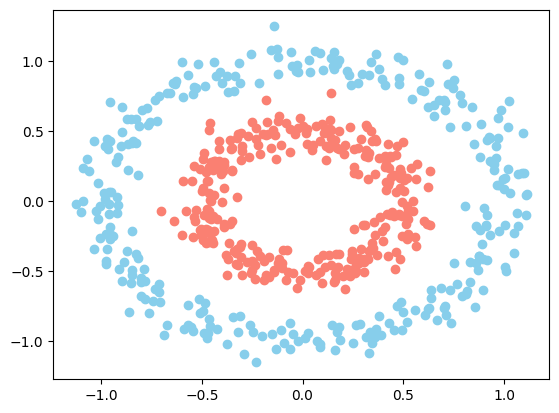

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
n=600
p=2
X,Y=make_circles(n_samples=n,factor=0.5,noise=0.08)
plt.scatter(X[Y==0,0],X[Y==0,1], c='skyblue')
plt.scatter(X[Y==1,0],X[Y==1,1], c='salmon')
plt.show()

In [ ]:
#Separamos los datos de entranmiento con los datos de prueba
r=X
t=Y
n=60
y_test=t.copy()
y_train=t.copy()
i=j=k=0
for k in range(t.size):
  v=t[k]
  if (v==0) & (i<n):
    t[k]=3
    i=i+1
  if (v==1)& (j<n):
    t[k]=3
    j=j+1
  if j+i==2*n:
    break



x_test=r[t==3]
y_test=y_test[t==3]

x_train=r[t!=3]
y_train=y_train[t!=3]

In [ ]:
def OneHotEncoding(x):
  v=np.zeros((2,1))
  v[x]=1
  return v

In [ ]:
x_trainv=[np.reshape(k,(2,1)) for k in x_train]
y_trainv=[OneHotEncoding(k) for k in y_train]
train=zip(x_trainv,y_trainv)
x_testv=[np.reshape(k,(2,1)) for k in x_test]
test=zip(x_testv,y_test)

In [ ]:
len(list(test))

120

In [ ]:
len(list(train))

480

In [ ]:
l=Network1([2,15,2])
l.SGD(train, 10, 5, 1.0, test_data=test)

Epoch 0 complete


ZeroDivisionError: ignored

In [ ]:
rn1=Network([784,30,10])
rn1.SGD(X_train,30,10,0.1,X_test)

In [ ]:
X=dat[0,0].shape #Tiene 60,0000 elementos, estos elementos son matrices

In [ ]:
Y=dat[0,1].shape #Tiene 60,000 elementos, estos son los elementos numéricos que indica que digito ilustra cada imagen

In [ ]:
#Lo mismo que antes pero con 10,000 elementos(Estos los vamos a utilizar como elementos de prueba)
x=dat[1,0].shape
y=dat[1,1]

In [ ]:
(x_train,y_train),(x_test,y_test)=dataset